### Import Libraries

In [1]:
from nltk.corpus import stopwords
import re
import os
import pandas as pd
import matplotlib.pyplot as plt
import string
import numpy as np

### Load Target File

In [2]:
benefits_grid = pd.read_csv('Benefits Grid.csv')

In [3]:
#Clean Implant coverage target
benefits_grid['Implant Coverage (Y/N)'] = benefits_grid['Implant Coverage (Y/N)'].str.replace('with rider?', 'Y') #Change with rider
benefits_grid['Implant Coverage (Y/N)'] = benefits_grid['Implant Coverage (Y/N)'].str.strip() #Strip spaces
benefits_grid['Implant Coverage (Y/N)'] = benefits_grid['Implant Coverage (Y/N)'].str.replace('?', '') #Strip ?
benefits_grid['Implant Coverage (Y/N)'] = benefits_grid['Implant Coverage (Y/N)'].str.replace('Unknown', 'N') #Change Unknown to N
benefits_grid['Implant Coverage (Y/N)'] = benefits_grid['Implant Coverage (Y/N)'].astype(str).str[0] #Get only first character

In [4]:
#Clean Root Canal coverage target
benefits_grid['Root Canal Coverage (Y/N)'] = benefits_grid['Root Canal Coverage (Y/N)'].str.replace('with rider?', 'Y') #Change with rider
benefits_grid['Root Canal Coverage (Y/N)'] = benefits_grid['Root Canal Coverage (Y/N)'].str.strip() #Strip spaces
benefits_grid['Root Canal Coverage (Y/N)'] = benefits_grid['Root Canal Coverage (Y/N)'].str.replace('?', '') #Strip ?
benefits_grid['Root Canal Coverage (Y/N)'] = benefits_grid['Root Canal Coverage (Y/N)'].str.replace('Unknown', 'N') #Change Unknown to N
benefits_grid['Root Canal Coverage (Y/N)'] = benefits_grid['Root Canal Coverage (Y/N)'].astype(str).str[0] #Get only first character

In [5]:
#Healthy food rollover target
benefits_grid['Healthy Food Rollover'] = benefits_grid['Healthy Food Rollover'].str.strip() #Strip spaces
benefits_grid['Healthy Food Rollover'] = benefits_grid['Healthy Food Rollover'].str.replace('UNK', 'N')  #Change Unknown to N
benefits_grid['Healthy Food Rollover'] = benefits_grid['Healthy Food Rollover'].str.replace('N/A', 'N')  #Change N/A to N
benefits_grid['Healthy Food Rollover'] = benefits_grid['Healthy Food Rollover'].str.replace('NC', 'N')  #Change NC to N
benefits_grid['Healthy Food Rollover'] = benefits_grid['Healthy Food Rollover'].astype(str).str[0] #Get only first character

In [6]:
#OTC rollover target
benefits_grid['OTC Rollover (Y/N)'] = benefits_grid['OTC Rollover (Y/N)'].str.strip() #Strip spaces
benefits_grid['OTC Rollover (Y/N)'] = benefits_grid['OTC Rollover (Y/N)'].str.replace('UNK', 'N')  #Change Unknown to N
benefits_grid['OTC Rollover (Y/N)'] = benefits_grid['OTC Rollover (Y/N)'].str.replace('N/A', 'N')  #Change N/A to N
benefits_grid['OTC Rollover (Y/N)'] = benefits_grid['OTC Rollover (Y/N)'].str.replace('NC', 'N')  #Change NC to N
benefits_grid['OTC Rollover (Y/N)'] = benefits_grid['OTC Rollover (Y/N)'].astype(str).str[0] #Get only first character

In [7]:
benefits_grid = benefits_grid.replace(np.nan, 'N')

In [8]:
benefits_grid['Implant Coverage (Y/N)'] = benefits_grid['Implant Coverage (Y/N)'].str.upper()
benefits_grid['Root Canal Coverage (Y/N)'] = benefits_grid['Root Canal Coverage (Y/N)'].str.upper()
benefits_grid['Healthy Food Rollover'] = benefits_grid['Healthy Food Rollover'].str.upper()
benefits_grid['OTC Rollover (Y/N)'] = benefits_grid['OTC Rollover (Y/N)'].str.upper()

### EDA of Cleaned Targets

Text(0.5, 1.0, 'Most plans do not cover dental implants')

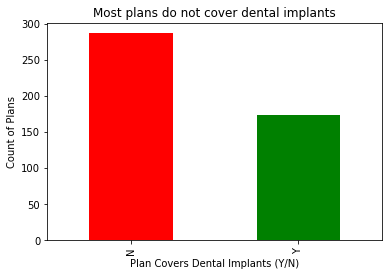

In [9]:
#Implant Coverage
benefits_grid['Implant Coverage (Y/N)'].value_counts().plot(kind='bar', color=['red','green'])
plt.xlabel("Plan Covers Dental Implants (Y/N)")
plt.ylabel("Count of Plans")
plt.title("Most plans do not cover dental implants")

Text(0.5, 1.0, 'Most plans cover root canals')

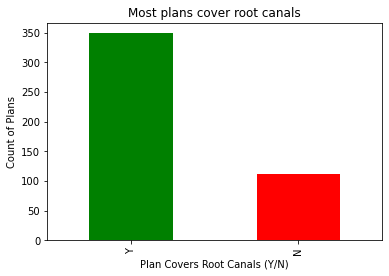

In [10]:
#Root Canal Coverage
benefits_grid['Root Canal Coverage (Y/N)'].value_counts().plot(kind='bar', color=['green','red'])
plt.xlabel("Plan Covers Root Canals (Y/N)")
plt.ylabel("Count of Plans")
plt.title("Most plans cover root canals")

Text(0.5, 1.0, 'Vast majority of plans do not allow food benefit rollovers')

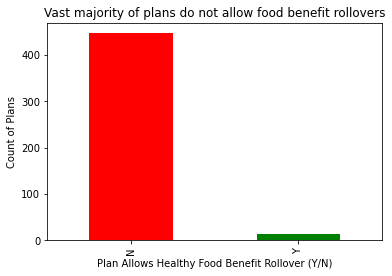

In [11]:
#Healthy Food Rollover
benefits_grid['Healthy Food Rollover'].value_counts().plot(kind='bar', color=['red','green'])
plt.xlabel("Plan Allows Healthy Food Benefit Rollover (Y/N)")
plt.ylabel("Count of Plans")
plt.title("Vast majority of plans do not allow food benefit rollovers")

Text(0.5, 1.0, 'Most plans do not allow OTC benefit rollovers')

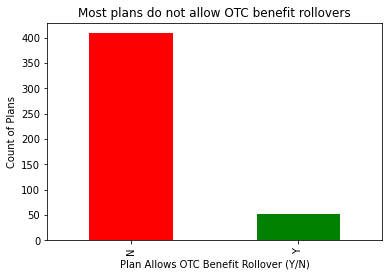

In [12]:
#OTC Rollover
benefits_grid['OTC Rollover (Y/N)'].value_counts().plot(kind='bar', color=['red','green'])
plt.xlabel("Plan Allows OTC Benefit Rollover (Y/N)")
plt.ylabel("Count of Plans")
plt.title("Most plans do not allow OTC benefit rollovers")